___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_m = pd.read_csv('MALE.csv', encoding='latin-1' )
df_m

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [3]:
df_f = pd.read_csv('FEMALE.csv', encoding='latin-1' )
df_f.rename(columns={'SubjectId': 'subjectid'}, inplace=True)
df_f

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,29501,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [4]:
df = pd.concat([df_m, df_f], axis=0).reset_index(drop=True)
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29501,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,29502,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,29503,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,29511,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [5]:
df.isnull().sum().sum()

4647

In [6]:
for features in df.columns:
    if df[features].dtype == 'object':
        print(df[features].value_counts(), 'sep=\n')

Male      4082
Female    1986
Name: Gender, dtype: int64 sep=

27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
             ..
11-Feb-11     3
25-May-11     2
7-Apr-11      2
7-Sep-11      1
16-Nov-10     1
Name: Date, Length: 253, dtype: int64 sep=

Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: Installation, dtype: int64 sep=

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64 sep=

Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64 sep=

11B     671
88M     320
92A     288
91B     230
68W     222
       ... 
15D       1
25G       1
915E      1
19B       1
76B       1
Name: PrimaryMOS, Length

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [8]:
for i in df.columns:
    print(i, '--------', df[i].isnull().sum() )

subjectid -------- 0
abdominalextensiondepthsitting -------- 0
acromialheight -------- 0
acromionradialelength -------- 0
anklecircumference -------- 0
axillaheight -------- 0
balloffootcircumference -------- 0
balloffootlength -------- 0
biacromialbreadth -------- 0
bicepscircumferenceflexed -------- 0
bicristalbreadth -------- 0
bideltoidbreadth -------- 0
bimalleolarbreadth -------- 0
bitragionchinarc -------- 0
bitragionsubmandibulararc -------- 0
bizygomaticbreadth -------- 0
buttockcircumference -------- 0
buttockdepth -------- 0
buttockheight -------- 0
buttockkneelength -------- 0
buttockpopliteallength -------- 0
calfcircumference -------- 0
cervicaleheight -------- 0
chestbreadth -------- 0
chestcircumference -------- 0
chestdepth -------- 0
chestheight -------- 0
crotchheight -------- 0
crotchlengthomphalion -------- 0
crotchlengthposterioromphalion -------- 0
earbreadth -------- 0
earlength -------- 0
earprotrusion -------- 0
elbowrestheight -------- 0
eyeheightsitting ----

In [9]:
df.DODRace.value_counts()

# This will be my target feature. But i feel some problem of it being unbalanced. So at first step i will use the feature
# as it is but later i should see the scores by pruning its last three values (5, 6 and 8)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

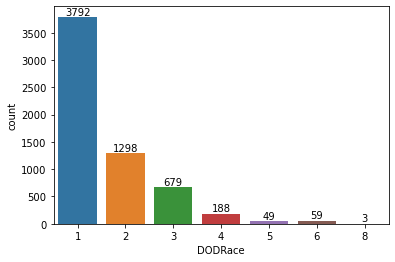

In [10]:
ax = sns.countplot(data = df, x ='DODRace')
ax.bar_label(ax.containers[0]);

In [11]:
# a= df[df.DODRace <5]
# a.DODRace.value_counts()

In [12]:
cat_feat = []
for features in df.columns:
    if df[features].dtype == 'object':
        cat_feat.append(features)
        
cat_feat

['Gender',
 'Date',
 'Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'Ethnicity',
 'WritingPreference']

In [13]:
df.shape

(6068, 108)

In [14]:
df.drop('Ethnicity', axis=1, inplace=True)
df.shape

# I dropped this feature due to majority of missing values

(6068, 107)

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.drop(['subjectid', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Heightin', 'Weightlbs', 'Date'], 
        axis = 1, inplace=True)

# I assessed these features have no significant effect on dependent variable
# At this stage I preffered not to drop the features Writing Preference, Installation, Component, Branch and PrimaryMOS
# But It might be better to see the scores without these features, so i will try it later...

In [17]:
df.drop(['Installation', 'PrimaryMOS'], 
        axis = 1, inplace=True)

In [18]:
df.shape

(6068, 99)

In [19]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,...,0.859924,0.939899,0.958932,0.579296,0.162457,0.825714,0.550544,0.389220,-0.079167,0.380614
acromialheight,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,...,0.446707,0.413142,0.371948,0.604967,0.933248,0.684610,0.734622,0.922687,-0.235121,0.078582
acromionradialelength,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,0.351546,...,0.384245,0.364133,0.338024,0.481149,0.851464,0.603964,0.646149,0.684979,-0.201095,0.076888
anklecircumference,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,0.453308,...,0.589723,0.569306,0.517324,0.479788,0.420109,0.745950,0.702178,0.514394,-0.158360,-0.025016
axillaheight,0.290821,0.987452,0.862074,0.469964,1.000000,0.657168,0.790214,0.707868,0.465773,0.369885,...,0.372178,0.337927,0.301106,0.565922,0.948190,0.621812,0.687252,0.905063,-0.229070,0.040748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weightkg,0.825714,0.684610,0.603964,0.745950,0.621812,0.731982,0.653566,0.707292,0.875688,0.582281,...,0.859654,0.872724,0.832213,0.677454,0.532079,1.000000,0.801215,0.671151,-0.133350,0.228096
wristcircumference,0.550544,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,...,0.581908,0.579536,0.557457,0.614334,0.637957,0.801215,1.000000,0.663991,-0.181502,0.148806
wristheight,0.389220,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,...,0.484488,0.446004,0.396134,0.615569,0.817358,0.671151,0.663991,1.000000,-0.257819,0.105944
DODRace,-0.079167,-0.235121,-0.201095,-0.158360,-0.229070,-0.108116,-0.113672,-0.124767,-0.066587,-0.157624,...,-0.132314,-0.103039,-0.082569,-0.140695,-0.212210,-0.133350,-0.181502,-0.257819,1.000000,0.004738


In [20]:
cat_feat = []
for features in df.columns:
    if df[features].dtype == 'object':
        cat_feat.append(features)
        
cat_feat

['Gender', 'Component', 'Branch', 'WritingPreference']

In [21]:
for features in df.columns:
    if df[features].dtype == 'object':
        print(df[features].value_counts(), 'sep=\n')

Male      4082
Female    1986
Name: Gender, dtype: int64 sep=

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64 sep=

Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: Branch, dtype: int64 sep=

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64 sep=



# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [22]:
X = df.drop(columns=['DODRace'])
y = df.DODRace

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 101)

In [25]:
cat = ['Gender', 'Component', 'Branch', 'WritingPreference']
cat

['Gender', 'Component', 'Branch', 'WritingPreference']

In [26]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [27]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]

In [28]:
pipe_model = Pipeline(steps=operations)

In [29]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('column_transfer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=101))])

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [31]:
def eval_metric(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print()
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
df.DODRace.value_counts()

# İlk olarak DODRace featureındaki bütün categoriler ile modeli çalıştırıp sonuca bakalım.
# Çıkan sonuçlara göre 5, 6 ve 8 nolu kategorileri drop edip tekrar modelin vanilla haliyle sonuçlara bakalım.

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [33]:
eval_metric(pipe_model)

Test_Set

[[732  11  14   2   0   0]
 [ 19 237   4   0   0   0]
 [ 65  18  47   5   0   1]
 [ 12   3   6  16   0   0]
 [  7   0   3   0   0   0]
 [  3   3   2   3   0   1]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.92       759
           2       0.87      0.91      0.89       260
           3       0.62      0.35      0.44       136
           4       0.62      0.43      0.51        37
           5       0.00      0.00      0.00        10
           6       0.50      0.08      0.14        12

    accuracy                           0.85      1214
   macro avg       0.58      0.46      0.48      1214
weighted avg       0.83      0.85      0.83      1214


Train_Set

[[2905   31   85   12    0    0    0]
 [  54  958   24    2    0    0    0]
 [ 261   53  213   15    0    1    0]
 [  38    4   19   88    0    2    0]
 [  29    4    6    0    0    0    0]
 [  20    2    7    8    0   10    0]
 [   1    1    0    0    0    0    1]]
     

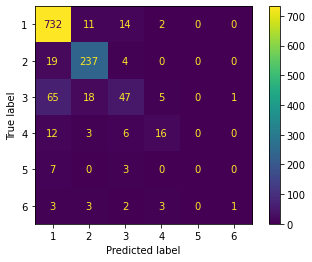

In [34]:
plot_confusion_matrix(pipe_model,X_test,y_test);

In [35]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [36]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["f1_weighted"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:,2:].mean()
df_scores

test_f1_weighted     0.818343
train_f1_weighted    0.845654
dtype: float64

In [37]:
# DODRace featurında sample sayısı görece düşük olan üç kategoriyi atıp bütün işlemleri tekrar ederek skorlara bakıyoruz

df2 = df[df.DODRace <4].reset_index(drop=True)
X= df2.drop(columns=['DODRace'])
y = df2.DODRace

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 101)

In [39]:
cat = ['Gender', 'Component', 'Branch', 'WritingPreference']
cat

['Gender', 'Component', 'Branch', 'WritingPreference']

In [40]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [41]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]

In [42]:
pipe_model2 = Pipeline(steps=operations)

In [43]:
pipe_model2.fit(X_train, y_train)

Pipeline(steps=[('column_transfer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=101))])

In [44]:
eval_metric(pipe_model2)

Test_Set

[[731  14  13]
 [ 19 237   4]
 [ 68  19  49]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.93       758
           2       0.88      0.91      0.89       260
           3       0.74      0.36      0.49       136

    accuracy                           0.88      1154
   macro avg       0.84      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set

[[2924   27   83]
 [  56  960   22]
 [ 266   59  218]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.92      0.92      1038
           3       0.67      0.40      0.50       543

    accuracy                           0.89      4615
   macro avg       0.83      0.76      0.79      4615
weighted avg       0.88      0.89      0.88      4615



In [45]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["f1_weighted"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:,2:].mean()
df_scores

# multiclass datalarda CV veya gridsearchCV için precision, recall ve f1 metriclerini tek başına kullanmayız. Yukarda olduğu
# gibi precision_weighted, precision_macro, precision_micro vb. yazmalıyız. Yoksa hata alırsınız. Spesifik olarak tek bir 
# sınıfa ait CV scorlarını görmek istiyorsak aşağıda gösterildiği gibi make_scorer fonksiyonunu kullanmalıyız.

test_f1_weighted     0.858358
train_f1_weighted    0.879209
dtype: float64

### 1 classı için cross validation

In [46]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_class1 = make_scorer(f1_score, average = None, labels =[1])
precision_class1 = make_scorer(precision_score, average = None, labels =[1])
recall_class1 = make_scorer(recall_score, average = None, labels =[1])


scoring = {"f1_class1":f1_class1, 
           "precision_class1":precision_class1,
           "recall_class1":recall_class1}

In [47]:
operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_f1_class1            0.919292
train_f1_class1           0.930271
test_precision_class1     0.889266
train_precision_class1    0.900360
test_recall_class1        0.951564
train_recall_class1       0.962243
dtype: float64

### Classlar için probabilityler

In [48]:
y_pred=pipe_model2.predict(X_test)
y_pred_proba = pipe_model2.predict_proba(X_test)
y_pred_proba

array([[1.69728372e-03, 9.98225754e-01, 7.69619465e-05],
       [9.94485498e-01, 3.64213151e-04, 5.15028912e-03],
       [7.50265371e-01, 4.02176760e-02, 2.09516953e-01],
       ...,
       [9.45491679e-01, 4.03773820e-03, 5.04705826e-02],
       [1.16254127e-03, 9.92744312e-01, 6.09314717e-03],
       [8.32992398e-01, 6.78446841e-03, 1.60223134e-01]])

In [49]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_class1"] = y_pred_proba[:,0]
test_data["pred_proba_class2"] = y_pred_proba[:,1]
test_data["pred_proba_class3"] = y_pred_proba[:,2]
test_data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Gender,Component,Branch,Age,WritingPreference,DODRace,pred,pred_proba_class1,pred_proba_class2,pred_proba_class3
2762,374,1574,355,256,1469,273,213,444,428,305,...,Male,Regular Army,Combat Service Support,32,Left hand,2,2,0.001697,0.998226,0.000077
4283,242,1373,312,253,1286,244,176,374,324,281,...,Female,Army National Guard,Combat Service Support,23,Right hand,1,1,0.994485,0.000364,0.005150
1224,252,1427,333,222,1311,253,199,415,342,276,...,Male,Army National Guard,Combat Service Support,58,Right hand,1,1,0.750265,0.040218,0.209517
4238,293,1396,323,220,1300,242,190,374,350,306,...,Female,Regular Army,Combat Service Support,22,Right hand,2,2,0.000250,0.994998,0.004752
4230,248,1271,297,225,1197,229,183,359,282,285,...,Female,Regular Army,Combat Support,47,Right hand,2,2,0.002830,0.980812,0.016358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,275,1614,359,270,1504,271,234,430,388,317,...,Male,Army National Guard,Combat Support,24,Left hand,1,1,0.991021,0.000827,0.008152
4366,190,1303,300,200,1210,226,168,371,260,270,...,Female,Regular Army,Combat Support,37,Right hand,1,1,0.789750,0.000321,0.209929
3039,232,1372,330,227,1259,246,189,406,331,279,...,Male,Regular Army,Combat Service Support,19,Right hand,1,1,0.945492,0.004038,0.050471
2813,202,1294,308,225,1187,244,200,422,316,238,...,Male,Regular Army,Combat Service Support,22,Right hand,2,2,0.001163,0.992744,0.006093


### Logistic Model GridsearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, return_train_score=True)

# 


In [51]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transfer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(

In [52]:
grid_model.best_params_

{'logistic__C': 5, 'logistic__penalty': 'l2'}

In [53]:
grid_model.best_score_

0.8715059588299026

In [54]:
y_pred = grid_model.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [55]:
eval_metric(grid_model)

Test_Set

[[729  14  15]
 [ 19 237   4]
 [ 67  18  51]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.93       758
           2       0.88      0.91      0.90       260
           3       0.73      0.38      0.50       136

    accuracy                           0.88      1154
   macro avg       0.83      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set

[[2919   29   86]
 [  54  962   22]
 [ 265   59  219]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.93      0.92      1038
           3       0.67      0.40      0.50       543

    accuracy                           0.89      4615
   macro avg       0.83      0.76      0.79      4615
weighted avg       0.88      0.89      0.88      4615



In [56]:
eval_metric(pipe_model2)

Test_Set

[[731  14  13]
 [ 19 237   4]
 [ 68  19  49]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.93       758
           2       0.88      0.91      0.89       260
           3       0.74      0.36      0.49       136

    accuracy                           0.88      1154
   macro avg       0.84      0.75      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set

[[2924   27   83]
 [  56  960   22]
 [ 266   59  218]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.92      0.92      1038
           3       0.67      0.40      0.50       543

    accuracy                           0.89      4615
   macro avg       0.83      0.76      0.79      4615
weighted avg       0.88      0.89      0.88      4615



### Precision Recall Curve

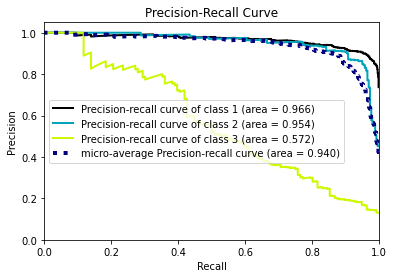

In [57]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

operations = [('column_transfer', column_trans), ('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=101))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model 

In [58]:
!pip install xgboost

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC


In [60]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,1054,815,175,853,Male,Regular Army,Combat Arms,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,1054,726,167,815,Male,Regular Army,Combat Support,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,1041,929,180,831,Male,Regular Army,Combat Support,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,968,794,176,793,Male,Regular Army,Combat Service Support,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,1245,946,188,954,Male,Regular Army,Combat Service Support,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,285,1392,335,223,1297,252,196,368,299,312,...,1002,832,162,836,Female,Army National Guard,Combat Support,3,51,Right hand
5765,262,1324,301,202,1204,236,181,378,294,287,...,958,717,157,804,Female,Army National Guard,Combat Support,3,40,Right hand
5766,260,1334,318,213,1259,234,183,363,332,299,...,970,762,159,774,Female,Army National Guard,Combat Support,2,40,Right hand
5767,205,1293,302,199,1207,213,163,376,276,280,...,952,632,146,769,Female,Army National Guard,Combat Support,3,31,Right hand


In [61]:
scaler = MinMaxScaler()
modelSVM =  SVC(kernel="rbf")


In [62]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder = 'passthrough')

In [63]:
operations = [('column_transfer', column_trans), ('scaler', scaler), ('SVM', modelSVM)]

In [64]:
pipe_model_SVM = Pipeline(steps = operations)

In [65]:
pipe_model_SVM.fit(X_train, y_train)

Pipeline(steps=[('column_transfer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()), ('SVM', SVC())])

In [66]:
y_pred_test = pipe_model_SVM.predict(X_test)
y_pred_train = pipe_model_SVM.predict(X_train)

In [67]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='weighted')
svm_f1_train = f1_score(y_train, y_pred_train, average='weighted')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.8492201039861352,
 0.8697724810400866,
 0.8067894021522168,
 0.8297476451286824)

In [68]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[745  11   2]
 [ 34 226   0]
 [110  17   9]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[3017   17    0]
 [  89  948    1]
 [ 452   42   49]]
TEST REPORT 
               precision    recall  f1-score   support

           1      0.838     0.983     0.905       758
           2      0.890     0.869     0.879       260
           3      0.818     0.066     0.122       136

    accuracy                          0.849      1154
   macro avg      0.849     0.639     0.636      1154
weighted avg      0.847     0.849     0.807      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           1      0.848     0.994     0.915      3034
           2      0.941     0.913     0.927      1038
           3      0.980     0.090     0.165       543

    accuracy                          0.870      4615
   macro avg      0.923     0.666     0.669      4615
weighted avg      0.8

###  SVC Model GridsearchCV

In [69]:
param_grid = {'SVM__C': [1],
              'SVM__gamma' : ["scale", "auto", 0.05],
              'SVM__class_weight' : ['balanced'],
             # 'SVM__kernel': ['rbf', 'sigmoid', 'poly', 'linear']
            }

operations = [('column_transfer', column_trans), ('scaler', scaler), ('SVM', modelSVM)]
model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1",
                              refit=True,
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('column_transfer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': [1], 'SVM__class

In [70]:
svm_model_grid.best_params_

{'SVM__C': 1, 'SVM__class_weight': 'balanced', 'SVM__gamma': 'scale'}

In [71]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [72]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='weighted')
svm_f1_train = f1_score(y_train, y_pred_train, average='weighted')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.8180242634315424, 0.857204767063922, 0.8314887780788077, 0.8693643182464783)

In [73]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[620  18 120]
 [ 16 233  11]
 [ 30  15  91]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[2550   42  442]
 [  24  974   40]
 [  83   28  432]]
TEST REPORT 
               precision    recall  f1-score   support

           1      0.931     0.818     0.871       758
           2      0.876     0.896     0.886       260
           3      0.410     0.669     0.508       136

    accuracy                          0.818      1154
   macro avg      0.739     0.794     0.755      1154
weighted avg      0.857     0.818     0.831      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           1      0.960     0.840     0.896      3034
           2      0.933     0.938     0.936      1038
           3      0.473     0.796     0.593       543

    accuracy                          0.857      4615
   macro avg      0.788     0.858     0.808      4615
weighted avg      0.8

## 3. RF

### Vanilla RF Model

In [76]:
scaler = MinMaxScaler()

In [82]:
cat

['Gender', 'Component', 'Branch', 'WritingPreference']

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [84]:
operations = [("OrdinalEncoder", column_trans), ('scaler', scaler), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

def eval_metric(model):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [86]:
eval_metric(pipe_model)

Test_Set
[[747  10   1]
 [ 74 186   0]
 [119  14   3]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       758
           2       0.89      0.72      0.79       260
           3       0.75      0.02      0.04       136

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.57      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [87]:
operations = [("OrdinalEncoder", column_trans), ('scaler', scaler), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.802383
train_accuracy           1.000000
test_precision_micro     0.802383
train_precision_micro    1.000000
test_recall_micro        0.802383
train_recall_micro       1.000000
test_f1_micro            0.802383
train_f1_micro           1.000000
dtype: float64

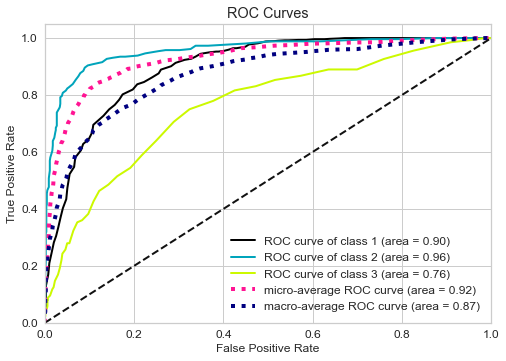

In [108]:
from scikitplot.metrics import plot_roc, precision_recall_curve

operations = [("OrdinalEncoder", column_trans), ('scaler', scaler), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]


model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

### RF Model GridsearchCV

In [97]:
param_grid = {'RF_model__n_estimators':[300,400,500],
             'RF_model__max_depth':[2,3]}

In [98]:
operations = [("OrdinalEncoder", column_trans), ('scaler', scaler), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]
model = Pipeline(steps=operations)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring='f1_macro',
                             n_jobs=-1,
                             return_train_score=True)

In [99]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(

In [100]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [101]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [102]:
rf_grid_model.best_index_

4

In [103]:
pd.DataFrame(rf_grid_model.cv_results_).loc[4, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.565165
mean_train_score    0.590935
Name: 4, dtype: object

In [104]:
rf_grid_model.best_score_

0.5651654306373015

In [105]:
eval_metric(rf_grid_model)

Test_Set
[[407  72 279]
 [ 29 195  36]
 [ 33  20  83]]
              precision    recall  f1-score   support

           1       0.87      0.54      0.66       758
           2       0.68      0.75      0.71       260
           3       0.21      0.61      0.31       136

    accuracy                           0.59      1154
   macro avg       0.59      0.63      0.56      1154
weighted avg       0.75      0.59      0.63      1154


Train_Set
[[1654  265 1115]
 [  79  808  151]
 [ 131   45  367]]
              precision    recall  f1-score   support

           1       0.89      0.55      0.68      3034
           2       0.72      0.78      0.75      1038
           3       0.22      0.68      0.34       543

    accuracy                           0.61      4615
   macro avg       0.61      0.67      0.59      4615
weighted avg       0.77      0.61      0.65      4615



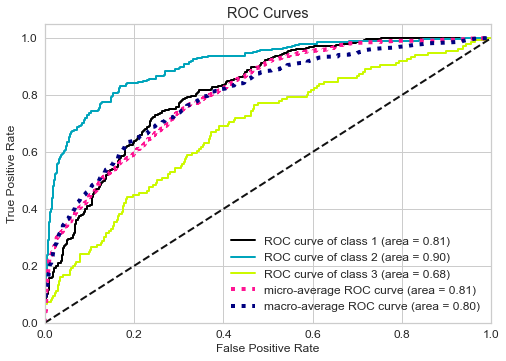

In [113]:
operations = [("OrdinalEncoder", column_trans), ('scaler', scaler), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=3, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [117]:
import xgboost
xgboost.__version__

'1.7.2'

In [118]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___